A6 MarkovDecisionProcesses

# Markov Decision Processes

## Grid World

##### Markov Decision Processes

- In this section: We formalize some RL concencepts we already know about
- Agent, enviroment, action, state, reward and episode
- Formal framework: Markov Decision Processes (MDPs)

##### Grid world
- Our game for the rest of the notebooks
- Possible actions:
    - Up, down, left, right
- (1,1) $\rightarrow$ wall, can't go here
- (0,3) $\rightarrow$ terminal($+1$ reward)
- (1,3) $\rightarrow$ terminal($-1$ reward)

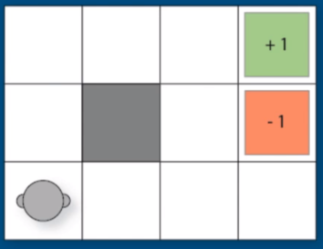


<span style='color:black'>
Grid world is our example for the rest of these notbooks. In many ways it is simpler than tic tac toe, but it has some properties that allows us to explore some intersting properties of RL. 
</span>


<span style='color:black'>
In Gridworld your agent is a robot and the environment, as you would probably guess, is a grid.
</span>


<span style='color:black'>
The agent is allowed to move in four directions up, down, left, to right. That is its entire set of actions. The grid is usually built in this way.
</span>


<span style='color:black'>
At position (1,1) there is a wall so the robot can't go there.
If it tries to go there it just bumps into the wall.
</span>


<span style='color:black'>
At position (0,3) and position (1,3)
we have two terminal states.
 </span>


 <span style='color:black'>
Position(0,3) is the goal state. You want to end up here because this is where you get your maximum reward.
 </span>
 

 <span style='color:black'>
Position (1,3) is a losing state.
If you end up here you lose.
We use the term lose loosely because we are
more concerned with well defined concepts like total reward.
In any case,
at this position you will receive a large negative reward
so you don't want to end up there.
</span>
    
<span style='color:black'>
One thing you'll notice about Gridworld is that is has
much smaller number of states than tic tac toe.
The state can defined as the position of the robot
so there are only 11 states
because the grid is of size 12
and the robot can't go to one of the squares.
</span>

<span style='color:black'>
There are only four actions.
So this is a relatively small game, 11 states and four actions
and from this
we will derive the rest of the concepts.
</span>

- 12 positions
- 11 states (where the robot is)
- 4 actions
- Small game!
- However, many concepts can be learned

## Markov Property
- The Markov Property is a central decision in Markov Decision Processes
- In the context of RL, in looks a little different than we have seen it before.

#### Markov Property review in mathamatical sence 
- Given a sequence: 
$$\left \{ x_{1}, x_{2},\dots, x_{t} \right \}$$
    
- We define a conditional probability on $x_{t}$ given all the previous $x$'s, in general this cannot be simplified:
  
  $$ p\left \{  x_{t} | x_{t-1}, x_{t-2},\dots, x_{1} \right \}  $$
  
- But if we assume that the Markov property is true then it can be simplified.$x$ depends on so first order Markov $x_{t}$ depends only on $x_{t-1}$.
- First-order Markov ("Markov") :
  $$ p\left \{  x_{t} | x_{t-1}, x_{t-2},\dots, x_{1} \right \} = p\left \{  x_{t} | x_{t-1}  \right \}$$
  
- Second order Markov $x_{t}$ depends only on $x_{t-1}$ and  $x_{t-2}$.

$$ p\left \{  x_{t} | x_{t-1}, x_{t-2},\dots, x_{1} \right \} = p\left \{  x_{t} | x_{t-1}, x_{t-2}   \right \}$$

Here, we work with first order Markov's only and we refer to this as the "markov property".


#### The Markov Property  in RL

- $\left \{ S(t), A(t)) \right \}$ produces 2 things $\rightarrow \left \{ S(t+1), A(t+1)) \right \}$
- Markov Property:
$$ p \left \{ S_{t+1},R_{t+1} | S_{t},A_{t}, S_{t-1}, S_{t-1}, \dots,  S_{0},A_{0}   \right \} =  p \left \{ S_{t+1},R_{t+1} | S_{t},A_{t}  \right \} $$

- Convenience notation:

$$p \left \{ s', r | s,a \right \} =  p \left \{ S_{t+1}= s',R_{t+1} =r |  S_{t}=s,A_{t}= a \right \}$$

- Joint on $s'$ and $r$, conditioned on 2 other variables
- Different from "usual" Markov: 1 RV conditioned on 1 other RV

<span style='color:blue'>
The Markov property looks a little different
than what we've seen in the past.
Let's review the Markov property
in the strict mathematical sense.
Suppose we have a sequence of $x_1$ up to $x_t$.
We can define a conditional probability on $x_t$,
given all the previous $x_s$.
Generally speaking, this can't be simplified.
But if we assume that the Markov
property is true, then it can.
</span>

<span style='color:blue'>
So what does the Markov property look
like in reinforcement learning.
Recall that doing an action A of t,
while in state S of t, produces two things.
It produces the next state, S of t plus one
and a reward, R of t plus one.
What the Markov property in this case says,
is that, S of t plus one and R of t plus one,
depend only on A of t and S of t,
but not any A or S before that.
For convenience, we can also use our shorthand symbols,
S, A, R and S prime.
</span>

<span style='color:blue'>
So how is this different from the usual way
we write the Markov property?
Well, notice how this is a joint
distribution on S prime and R.
So it's telling us the joint distribution
of two variables conditioned on two other variables.
This is different from the usual Markov form
where we have only one variable on the left
and one variable on the right.
</span>    


#### Other Conditional distributions
- Can be found using rules of probability
- For pretty much all cases we'll consider these will be deterministic
- i.e. states will always give you the same reward
- Action will always bring you to the same next state
- But, these distributions are part of the core theory of RL

$$p(s'|s,a) = \sum_{r \epsilon R} p(s',r|s,a)$$

$$p(r|s,a) = \sum_{s' \epsilon S} p(s',r|s,a)$$

<span style='color:blue'>    
Given this joint condition of distribution,
it is of course, just the matter of using
the rules of probability, to find the
marginal conditional distributions.
For example, if we just want to know 
$p(s'|s,a)$ , or we just want to know $p(r|s,a)$,
we can use these equations.
</span>


<span style='color:blue'>   
Also note that for pretty much all cases we'll consider,
these probabilities will be deterministic.
That means the reward you get for
going to the state, will always be the same reward and doing an action in a state,
will always bring you to the same next state.
But it's good to know that these probabilities
are defined if you need them
and they're also part of the core theory.
</span>

##### Is the Markov assumption limiting?

- Not necessarily.
- Recent applications: DeepMind used concatenation of 4 most recent frames to represent state when playing Atari games ([Mnih et al. 2013](https://arxiv.org/abs/1312.5602))
- State can be made up of anything from anytime past to current.
- Typically think of state right now = something we measure right now
- Also, don't need to use raw data (state can be feautures transformed from raw data)
- Any input from agent's sensors can be used to form state.

<span style='color:blue'>  
- As an example of how the Markov
assumption is not necessarily limiting,
we can look at a recent
application of reinforcement learning.

- DeepMind used the concatenation
of the four most recent frames
in order to represent the current state.

- Strictly speaking, this state can be made up of anything
from anytime from past to current.

- We just typically think of the state right now,
to be something we are measuring right now.
But that may not be the case.

- Note that we also need not use
raw data to represent the state,
the state can be made up of any
data derived from the raw data.
You might think of that as a featured
transformation on the raw data.

- Essentially, any input from the agent's sensors
can be used to form the state.
</span>  


#### Defining nd formalizing the MDP
- We've been looking at MDPs, just not calling them by name
- Any RL task with a set of states , actions, and rewards, that follows the Markov property, is a MDP
- MDP is defined as the collection of
    - Set of states
    - Set of actions
    - Set of rewards
    - State-transition probabilities, reward probabilities (as defined jointly earlier)
    - Discount factor (which we will see later)
 - Often written as a 5-tuple

<span style='color:blue'> 
We've essentially been looking at Markov Decision Processes
this whole time, just never calling it by name.
Any reinforcement learning task
with a set of states, actions, and rewards,
that follows the Markov property
is a Markov Decision Process.
Formally speaking, a Markov Decision Process is a five-tuple
made up of the set of states, set of rewards,
set of actions, the state-transition probabilities,
and the reward probabilities,
which we previously discussed as a joint distribution,
    </span> 

<span style='color:blue'> 
The other key term
in the Markov Decision Process is decision.The way we make decisions for what actions to do
in what states is called a policy.
We usually denote a policy with the symbol pi.
Technically, the policy is not part of the MDP itself,
but it's part of the solution along with the value function,
which we'll define more formally soon.
</span> 

#### Policy
- One more piece to complete the puzzle- the policy (denoted by $\pi$)
- Technically $\pi$ is not part of the MDP itself, but it, along with the value function, form the solution
- Left out until now because it's a weird symbol
- There's no "equation" for it
- How do you write epsilon-greedy as an equation? It's more like an algorithm
- The only exception is the **optimal policy**, which can be defined in terms of the value function (we'll discuss later)
- Think of $\pi$ as short hand for the algorithm the agent is using to navigate the enviroment

#### State Diagram

<span style='color:blue'>
So for now, pi is more like a short-hand notation
for the algorithm the agent is using
to navigate the environment.

Because a Markov Decision Process
satisfies the Markov property,
you can imagine we can also draw state-transition diagrams
for MDPs just like we do for Markov models
and hidden Markov models.
</span>

#### State-transition probability

$$p(s'|s,a)$$

- Why is this stochastic? If I press "jump" button, doesn't it always do the same thing?
- Recall: State is only derived from what agent senses, it's not the enviroment itself
- State can be imperfect representation of enviroment
- Example: State could represent multiple configurations of enviroment
- Example: Blackjack - if you're the agent, the dealer's next card is not part of your state (but it is part of the enviroment)

<span style='color:blue'>
Let's look at the state-transition probability again,
p of s prime given s and a.
Recall that I said this as typically deterministic,
but that's not always the case.
Why might that be so?
Remember that the state is only something derived
from what the agent senses from the environment.
It's not the environment itself.
The state can be
an imperfect representation of the environment,
in which case you would expect the state-transition
to be probabilistic.
</span>

<span style='color:blue'>
As an example of an imperfect
representation of the environment, think about blackjack.
You might think of the dealer's next card
as part of the state,
but if you're the agent,
you can't see the next card
so it's not a part of your state.
It is part of the environment.
</span>

#### Actions
- Typically we think of actions like joystick inputs (up/down/right/jump) or Blackjack moves (hit/stand).
- Actions can be very broad: How to distribute government funding.


<span style='color:blue'>
Sometimes there's confusion about what constitutes
the agent and the environment.
Think of yourself navigating your environment.
You might think you are the agent,
but what constitutes you?
Are you your body?
Your body is more correctly part of the environment.
Your body isn't making decisions or learning.
Your body has sensors which pass on signals to your brain,
but it's your brain or your mind
that does all the learning and decision making,\
so you want to be mindful of where you draw the boundary
that differentiates between agent and environment.
</span>

#### Agent Vs Enviroment
- You are navigating an enviroment, you are the agent - What constitutes "you"?
- Are you your body? No!
- Your body is part of the enviroment, your body doesn't make decisions/ learn
- Brain / mind does the learning

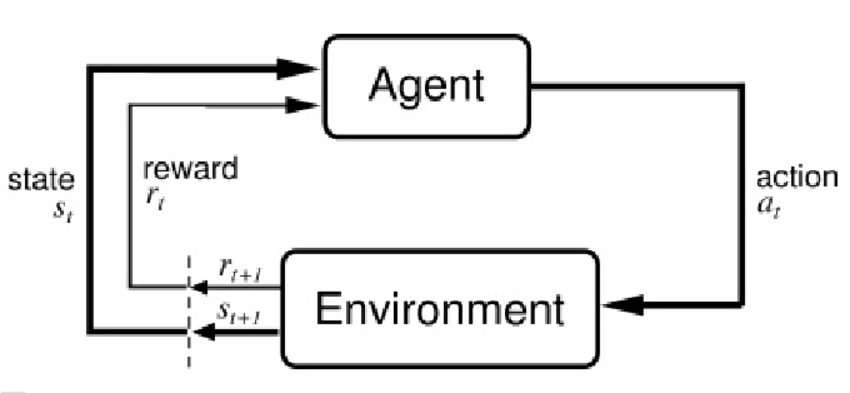

## Future Rewards

#### Total Rewards
- We are interested in measuring total **future** reward
- Everthing from $t+1$ onward
- We call this **return** , $G(t)$
- Note: does not count current reward $R(t)$

$$ G(t)= \sum_{\tau = 1}^{	\infty} R(t + \tau) $$

<span style='color:blue'>
Formalise the idea
of total reward.
In particular, what we are interested in is
measuring the total future reward.So everything from T plus one and onward.
We call this the return and we use the symbol G
to represent it.
Notice how it doesn't depend on the reward
at the current time.
This is because, strictly speaking,
when I arrive at a state,
I receive the reward for that state.
There is nothing I can predict about it
since it has already happened.
</span>

<span style='color:blue'>
Now think of a very long task,
a task containing a sequence that is
thousands of steps long.
Your goal is to maximise your total reward.
But is there a difference between getting a reward now
and getting that same reward 10 years from now?
Think about finance.
You know that $ \$ 1000 $ today is worth less
than $ \$ 1000 $ 10 years ago.
If I were to ask you: would you rather get $\$1000 $ today
or would you rather get $ \$ 1000 $ 10 years later?
You would of course choose today.
And so we introduce what is called a discount factor
on the future rewards.
</span>

#### Future Reward
- Imagine a very long task (thousands of steps)
- Is there a difference between getting a reward now, and getting the reward 10 years from now?
- Think finance
- $ \$ 1000 $ today is worth less than $ \$ 1000 $ 10 years ago
- Would you rather get $ \$ 1000 $ today or  $ \$ 1000 $ 10 years from now? Choose today!

<span style='color:blue'>
We call the discount factor gamma and we use a number
between zero and one to represent it.
It should be clear that a gamma of one
means we don't care how far in the future a reward is.
All future rewards should be weighted equally.
If gamma is zero, that means we don't care about
the future at all.
Doing that would be a truly greedy algorithm
since the agent would only try to maximise
its immediate reward.
Usually we choose something in between
like gamma equals 0.9.
</span>

<span style='color:blue'>
If we have a very short episodic task,
it may not be worth discounting at all.
An intuitive reason you might want to discount
future rewards is because the further you go in the future
the harder it is to predict.
So there's not a lot of sense in putting all your
effort into getting something 10 years from now
unless you're sure you can make it happen
and that your circumstances won't change.
</span>

#### Discount factor 
- Gamma = 1: don't care how far in the future the reward is, weight all equally
- Gamma = 0: truly greedy, only try to maximize immediate reward
- Usually we choose something close to 1, i.e. 0.9
- Short episodic task: maybe don't discount at all
- "The further you look into the future, the harder it is to predict"

$$ G(t) = \sum_{\tau=0}^{\infty} \gamma^{\tau} R(t+\tau+1) $$

#### Merging continuous and episodic tasks

<span style='color:blue'>
You'll notice that the sum for the return
goes from tau equals zero to infinity.
But recall that this suggests that we're looking
at a continuous task when in reality the games
we've seen: tic-tac-toe and grid world
are both episodic tasks.
This is a mathematical subtlety but we actually
want to write all of our equations in continuous form.
Simply put, it makes the math a little easier to work with.
There's a way to merge episodic and continuous tasks
so that they're equivalent.
The way you do it is this:
the episodic task has a terminal state.
What you can do is pretend that there's a state
transition from the terminal state to itself.
That always happens with probability one
and always yields a reward of zero.
In this way, the episodic task remains the same,
but since it technically goes on forever,
it's also a continuous task.
</span>

- Why count up to infinity? Aren't we doing episodic tasks?
- Yes, but math is easier with infinity
- Can make them technically equivalent

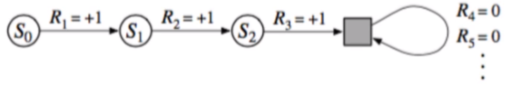

$$ G(t) = \sum_{\tau=0}^{\infty} \gamma^{\tau} R(t+\tau+1) $$

## Optimal Policy and Optimal Value function


- These are interdependent- a key concept in RL - lots of depth to this idea
- We can talk about the relative "goodness" of policies

$$
\begin{align}
\pi_{1} \geq \pi_{2} &  & \text{if } &V_{\pi_{1}}(s) \geq V_{\pi_{2}}(s) &  \forall s \epsilon S
\end{align}
$$

Let's say we have two policies pie one and pie two we can say pie one is better than Pie 2.
If the expected return of pie 1 is greater than or equal to the expected return of Pie 2 for all states
because we can talk about the relative goodness of policies and one policy can be better than another
policy then we also have the notion of the best policy in reinforcement learning.
We call this the optimal policy.
We use the symbol PI star to represent it.
The optimal policy is the policy for which there is no greater value function.

#### The Best Policy

- Optimal policy is the "best" policy
- The policy for which there is no greater value function

$$
\begin{align}
V_{*}(s) =  max_{\pi}\left \{ V_{\pi}(s) \right \} &  &\forall s \epsilon S
\end{align}
$$

- Optimal policies are not unique, optimal value functions are

We can write down the optimal value function as the max of the value function overall policies.
Note that optimal policies are not necessarily unique but optimal value functions are.
You can imagine how two policies can lead to the same rewards and hence lead to the same value functions.
But if you have one value function that's greater than another value function then the optimal policy
will be the one that leads to the greater value function.

#### Optimal Action-Value function

$$
\begin{align}
Q_{*}(s,a) =  max_{\pi}\left \{ Q_{\pi}(s,a) \right \} &  &\forall \text{ }  s \epsilon S &  , \text{ } a \epsilon A
\end{align}
$$


<span style='color:blue'>
We can similarly define the optimal action value function as the max of the action value function overall policies.
</span>


$$
\begin{align}
Q_{*}(s,a) = E \left [ R(t+1)+ \gamma V_{*}(S_{t+1})|S_{t} = s,  A_{t} = a \right ]
\end{align}
$$

<span style='color:blue'>
Because the optimal action value function is with respect to the optimal policy.
We can define it recursively in terms of the optimal state values function.
</span>

#### Relationship between V and Q
- Implementation advantage:
- To find the best action, we must actually do it to find the best $V(s')$
- With Q, we simply need to look up $Q(s,a)$

$$
\begin{align}
V_{*}(s) =  max_{a}\left \{ Q_{*}(s,a) \right \}
\end{align}
$$

<span style='color:blue'>
The state value function and the action value function can be related in this way.
The state value function means that we are always choosing the best actions and therefore choosing the
max overall actions from Q.
</span>

<span style='color:blue'>
Notice how Q leads to some practical advantages during implementation.
If we only have $V(s)$, then what we have to do is try all the possible actions to take us to their states
so we can get the values for those states.
But if we have Q, we can directly choose the best action over all actions say from Q.
</span>

#### Bellman Optimality Equation

$$
\begin{align}
V_{*}(s) &= max_{a} E \left [ R(t+1)+ \gamma V_{*}(S_{t+1})|S_{t} = s,  A_{t} = a \right ] \\
V_{*}(s) &=  max_{a} \sum_{s' , r} p \left (s',r|s,a \right ) \left [ r + \gamma V_{*}(s') \right ]
\end{align}
$$


<span style='color:blue'>
Let's continue manipulating our equation for $V_{*}(s)$.
We call this the Belman optimality equation for the state value function.
Notice how it's very similar but not exactly the same as the Belman equation.
</span>

#### Bellman Optimality Equation

$$
\begin{align}
Q_{*}(s,a) &= E \left [ R(t+1)+ \gamma\text { } max_{a'} Q_{*}(S_{t+1},a')|S_{t} = s,  A_{t} = a \right ] \\
Q_{*}(s,a) &= \sum_{s' , r} p \left (s',r|s,a \right ) \left [ r + \gamma\text { }  max_{a}Q_{*}(s',a') \right ]
\end{align}
$$


<span style='color:blue'>
We can do a similar thing to get the Belman optimality equation for the action value function.
</span>

#### Implementing the Optimal Policy
- Key point: value function already takes future rewards into account
- Just greedily choose the actionthat yields the best next-state value $V(s')$
- Requires look-ahead search
- If we have $Q(s,a)$, no need to look ahead, simply choose argmax
- $Q(s,a)$ thus effectively caches the look-ahead search results

<span style='color:blue'>
Once we have the optimal value function how do we implement the optimal policy?
</span>

<span style='color:blue'>
The key point is the value function already takes into account future rewards.
So nothing extra needs to be done in order to optimize the total expected future reward. All we need to do is choose the action that yields the best value for the next state.
</span>

<span style='color:blue'>
Notice how, for the state value function V, we need to do a look ahead search because V itself does not depend on a. So implementation wise, we need to do all the possible actions a,
look at what state we arrive in s prime and choose the one that gives us the largest $V(s')$.
</span>

<span style='color:blue'>
If we have a $Q(s,a )$ we can do this lookup directly.
What $Q(s,a )$ does then is it effectively cache's the results of all one step ahead search is.
</span>

---

## MDP summary
- Purely theoretical
- MDPs
- Policies
- Returns-total future reward
- Discounting future rewards with a discount rate, gamma
- State-value function
- Action-value function

<span style='color:black'>
The notebooks content is all theoretical, this was so we could set up all the prerequisites we need for the later sections. In particular we formalize the Markov Decision Process Framework.</span>

<span style='color:black'>
Notably in this section we more rigorously define value function and looked at two different types of value functions (the state value function and the action value function). </span>

- Bellman Equation
$$ V_{\pi}(s) = \sum_{a} \pi (a|s) \sum_{s^{'}}\sum_{r} p(s^{'},r|s,a)\left \{ r + \gamma V_{\pi}(s^{'}) \right \} $$

<span style='color:black'>
We looked at the Belmont equation which recursively defines the value function in terms of the value function at the next day.</span>

- Bellman Optimality Equations
- Next section:
    - Finding $V$ given a policy
    - Finding optimal policies and optimal values
    
$$V_{*}(s) = \text{max}_{a} E\left [ R(t+1)+ \gamma V_{*}(S_{t+1})|S_{t}= s, A_{t} = a \right ]$$

$$V_{*}(s) = \text{max}_{a}\sum_{s^{'} r} p(s^{'},r|s,a) \left [ r+\gamma V_{*}(s^{'}) \right ]$$

<span style='color:black'>
We looked at the notion of optimality and defined the optimal policy optimal state value function and optimal action value function. Through this we were also able to recursively define the optimal value functions in terms of optimal value functions at the next state. These are called the bellman optimally equations. In the next section we are going to begin looking at algorithms to compute the value functions for a given policy and the optimal value functions and optimal policy.
</span>